In [1]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import pandas as pd
import numpy as np
import wrangle
from env import host, user, password
import seaborn as sns
import matplotlib.pyplot as plt



1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [2]:
df = wrangle.get_data_from_sql()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [3]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

train.shape, validate.shape, test.shape

((1084, 4), (272, 4), (339, 4))

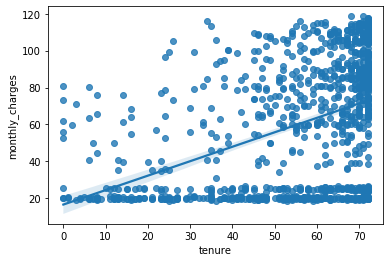

In [4]:
#sns.jointplot(x='tenure', y='monthly_charges', data=train)
sns.regplot(x='tenure', y='monthly_charges', data=train)

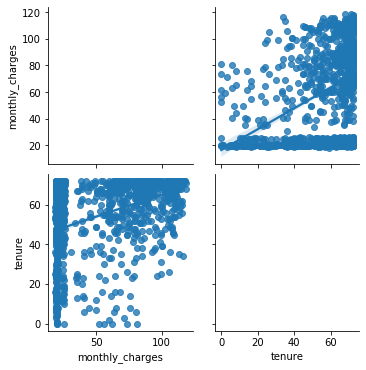

In [5]:
g = sns.PairGrid(train)
g
g.map_offdiag(sns.regplot)

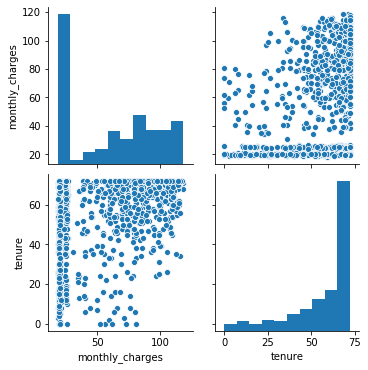

In [6]:
sns.pairplot(train)

In [7]:
def plot_variable_pairs():
    df = wrangle.get_data_from_sql()
    train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)
    fig = sns.regplot(x='tenure', y='monthly_charges', data=train)
    return fig


2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [9]:
df['tenure_years'] = (df.tenure / 12).round()
df.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,6.0
1,0014-BMAQU,84.65,63,5377.8,5.0
2,0016-QLJIS,90.45,65,5957.9,5.0
3,0017-DINOC,45.20,54,2460.55,4.0
4,0017-IUDMW,116.80,72,8456.75,6.0


In [10]:
def months_to_years():
    df = wrangle.get_data_from_sql()
    df['tenure_years'] = (df.tenure / 12).round(0)
    
    return df
    

3. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [11]:
df.head()
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

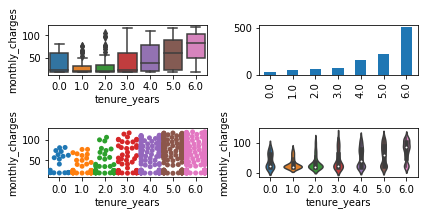

In [16]:
plt.subplot(321)
f1 = sns.boxplot(y='monthly_charges', x='tenure_years', data=train)
plt.subplot(322)
f2 = train.tenure_years.value_counts().sort_index().plot.bar()
plt.subplot(323)
f3 = sns.swarmplot(data=train, y='monthly_charges', x='tenure_years')
plt.subplot(324)
f4 = sns.violinplot(data=train, y='monthly_charges', x='tenure_years')

plt.tight_layout()
plt.show()

In [2]:
def plot_categorical_and_continuous_vars():
    df = wrangle.get_data_from_sql()
    df['tenure_years'] = (df.tenure / 12).round(0)
    train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)
    
    plt.subplot(321)
    f1 = sns.boxplot(y='monthly_charges', x='tenure_years', data=train)
    plt.subplot(322)
    f2 = train.tenure_years.value_counts().sort_index().plot.bar()
    plt.subplot(323)
    f3 = sns.swarmplot(data=train, y='monthly_charges', x='tenure_years')
    plt.subplot(324)
    f4 = sns.violinplot(data=train, y='monthly_charges', x='tenure_years')

4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

In [4]:
#created

# 4. a - Rewrite your notebook code so that you are using the functions imported from this file. Restart kernal and begin here.

In [1]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import pandas as pd
import numpy as np
import wrangle
from env import host, user, password
import seaborn as sns
import matplotlib.pyplot as plt
import explore

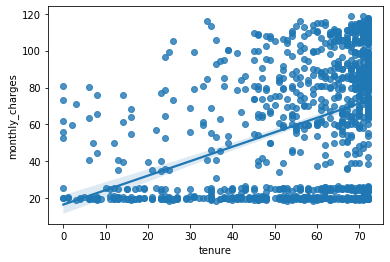

In [3]:
explore.plot_variable_pairs()

In [4]:
explore.months_to_years()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,6.0
1,0014-BMAQU,84.65,63,5377.8,5.0
2,0016-QLJIS,90.45,65,5957.9,5.0
3,0017-DINOC,45.20,54,2460.55,4.0
4,0017-IUDMW,116.80,72,8456.75,6.0
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.4,6.0
1691,9972-EWRJS,19.25,67,1372.9,6.0
1692,9975-GPKZU,19.75,46,856.5,4.0
1693,9993-LHIEB,67.85,67,4627.65,6.0


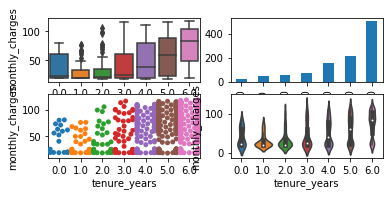

In [6]:
explore.plot_categorical_and_continuous_vars()